# Data Fundamentals (H)
John H. Williamson -- Session 2018/2019

----
<font color="red"> Read the submission instructions at the bottom of this notebook **carefully** before submitting </font> 

**This submission must be your own work; you will have to make a Declaration of Originality on submission.**

Note that marks shown when tests pass are **provisional** and could change after grading.

In [2]:
NAME = "Ross Angus" ## fill these in 
STUDENT_ID = "2244073A"  ## e.g. 2222222

---

## Lab 2: **Assessed**
# Numerical arrays and vectorized computation


### Notes
It is recommended to keep the lecture notes open while doing this lab exercise.

**This exercise is assessed**. Make sure you upload your solution by the deadline. See the notes at the bottom of this notebook for submission guidance.


### References
If you are stuck, the following resources are very helpful:


* [NumPy cheatsheet](https://github.com/juliangaal/python-cheat-sheet/blob/master/NumPy/NumPy.md)
* [NumPy API reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
* [NumPy user guide](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.html)


* [Python for Data Science cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf)
* [Another NumPy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)


## Purpose of this lab
This lab should help you:
* understand floating point representations
* understand how roundoff errors occur and how you can control them
* work with higher rank tensors, selecting the attributes you want to work with
* understand how to do simple operations in a vectorised manner

Note: this labe requires solving puzzles which require that you understand the course material. Very little code is required to get the correct solutions.


In [3]:
## custom utils
## uncomment and run the line below if you get an error about jhwutils

!pip --no-cache install --user -U https://github.com/johnhw/jhwutils/zipball/master   

# comment it again before submitting!

  Found existing installation: jhwutils 1.0
    Uninstalling jhwutils-1.0:
      Successfully uninstalled jhwutils-1.0
  Running setup.py install for jhwutils: started
    Running setup.py install for jhwutils: finished with status 'done'


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
# Standard imports
# Make sure you run this cell!
# NumPy
import numpy as np  
np.set_printoptions(suppress=True)

# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=140)

from jhwutils.checkarr import array_hash, check_hash
from jhwutils.float_inspector import print_float_html
import jhwutils.image_audio as ia
import jhwutils.tick as tick

print("Everything imported OK")

Everything imported OK


In [45]:
## RUN THIS!
# provide AstralSimulator and AstralViewer
import lzma, base64
exec(lzma.decompress(base64.b64decode('/Td6WFoAAATm1rRGAgAhARYAAAB0L+Wj4AxJBNFdADSbSme4Ujxz6pqAyg1MRxIGFIfjKedj74P7407CxCrCQCaOV7XvEMS/pGrlMQo1Rk06dw3aCiY7GvG+AJwP3W87rMFYp1fbK+mhpaCtsxxdNCrO6HyZGwmHrXiuUCx714gxbwk5GSBr8DwXTHmQ6mLBZz+VIAX8v8wCRRCplTSqeMur4MbIY9zIgBm/LFHo8SvAGkgCAR9MNW38Ebecelmc5fsKJcAZzIbANKtKQZ2GiI0gMrK2zZdJDaUWEz1MoAn4WKrYRub0XCZ5n4zoYMGaSXTNxXdbxVOkOfGG+xZ+F5Fe9oxCpxR5oUJBBHxLVG1DXKOOS/okr7d8lN3DxSzueQCGiHqEAjgAsjKJYmPMK5G3qnLBDwYatvsFiUbq/SbdNorJh5EiKa+xslXJg9J8Rk7t8t+YEFi06pm2aGQzNgOTSG14CGA1PYiie9cFvuL25ulyuPDlBa1xpUpp/DVkVejZnjEa45a1yw2ahE3tDz1nTa4AbXuQk2TtAW5xPpuHLkHcWhHTMMxRYpTY7WaJ/M1b8cKHu3ZWFUxJKhrOPx3AM7FhwjSE0MhP+bifJ/e590DAqqb94Z5MDWjdPuIjLwRtF+u7LfXRl7x8+s16WEx7IKefcWrGQi/OY/ot3mpvKPR5rvYnW8hTaZHVH8jYOFdEzDW6uRRgu17UIHmTIuyFbxtPopKody/As8CiFPp6bZanWs5XvYliJLycz913gDwXMOVagXnsvlMObY/AskaLvalpQaQ/fNqLhQyYb/PgQGB8vsh9i/XPeYfWUwmG8951SufyqQf+MfPgX6qvqNxXg8M4Z5vloNefzGisryYOuPhopL9phtXAFYAijUwxWYuv0wEKgXoVahb+pTTnJ2lSd+k7HepRzTHDA6xoTtQcY0Mfv/p6gfxg2FQb9iXIwVCbYloTBeVEwHLO7NpqwIyaY6xzzrmfTdbMBrVg4sJHsuaxA2pyCPSrP2Z+QvwYgbImYbYFdlA/S3madHSqG42QkUzCitp/HWpftKb0FeNag3Zalz3F9jX7pHp4E7Lhr9U+TgnPAlUtjles6m0bG5nNeBZEIH6JFoAdjHaNmUmv2kYmLVwZQZueaT0HYd4pLfu7SvM7Xb/eUCLE8e2cko3NNBWIdEhqUqqOj2xgdGAyA7syVDXJJeAClRwB1SQPgpR0DejKs3OKU36WLvfCHt3LCWX9BJWQ5dnV0vvbllGm4CLVxRuVmGuK+KVW6zAbRGLwaMrJfl7Z1o7yKIy6vfKAA1DdyFpOw1yS12jcAdgKBqstk6v1F/lzbMXAMLIBDo+VC+UavFJtCjU+nlD1O+QL07EyNFX5ggh1f3fdWU4Gk4RF6BnqP3fOkoVPoYBaklJc4MMVssZy4EoI8tfemA6kPfCicpcsfe7HWGPEBYJ8uEut4KERn/Zk7ABDIUbrfJKToWCqcbgwLsro7De9oJsIB48h9nM9QxO1hfulPUUcAMrROCv8azujNAhuBxxC4wZOr5PUruunS1J/RSMl2vp3PteyuF/k70F2mqpakPSpJ0g826//j31bFVkrnu+hLmpqm8wVHLkZV26rjHet7ark3G5oDb5+1l9bpNVp/U/DkikJ0YcDV9PhC/yuClssDD9Utyb7dDt746yLUYRo8AAAAAAFs1tgjJuhUgAB7QnKGAAAWkJab7HEZ/sCAAAAAARZWg==')))

# 1. Satellite stability [30 minutes]

You have been tasked with building a system to perform a satellite alignment maneuver. The satellite has to perform a slow roll to assume a new attitude. It is guided by [astronomical reference system](https://en.wikipedia.org/wiki/Star_tracker) that holds optically sensed star patterns to a reference pattern to hold attitude.

<img src="imgs/star_tracker.png">

*[By Daniel Chapman - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=26596454]*

The satellite is perturbed by a variety of external sources, including solar wind, thrust fluctuations and fluid flow in the fuel tanks. These make extremely tiny variations in the movements that actually occur compared to those that are predicted. The system, however, has built in sensors that can measure the influence of all of these variations very precisely. When the sensors have no adjustment to thrust to make, they use NaN (not a number) to represent no adjustment.

You have been presented with the code below, which is supposed to adjust the one of the thrusters of the satellite based on its current thruster state and the a collection of thruster adjustment inputs. The code looks **logically correct**, but it mysteriously does not work. The satellite becomes unstable and goes out of control.

## Task
Make a *minor* adjustment to the function `corrector` that will fix this problem. This will require knowledge of floating point. Note that you do not need to write any new correction algorithm, but identify and fix the problem in this existing code. This is a very minor adjustment but it requires clear understanding of floating point numbers.

Hint: you may wish to print run the simulator for a few steps with:

    space_sim.run(5, corrector=corrector)
    
and perhaps modify the `corrector` function to show the `current_thrust` and `adjustments` as it runs.

It should be possible to reduce the attitude error to almost unmeasurably small levels, as the sensing system is extremely accurate.


In [91]:
space_sim = AstralSimulator()

## This function is the corrector
## `current_thrust` is a scalar (IEEE754 float64) measuring the current thrust 
## `adjustments` is the thrust correction computed from the inputs from each of the sensors, representing
## the adjustment to apply (also IEEE754 float64, as an array)

def corrector(current_thrust, adjustments):

    ## Compute the influence of the sensed variations
    ## on the current state of the system, to produce a new reference state
    
    adjustments[(np.isnan(adjustments))] = np.nan_to_num(np.nan)
        
    ref_state = current_thrust + adjustments
    
    ## For each adjustment in the reference state,
    ## subtract the difference between the reference state and the current
    ## state, and accumulate the correction    
    for i in range(len(adjustments)):  
        #print (current_thrust,ref_state[i])
        current_thrust -= ref_state[i] - current_thrust
    ## return the new, corrected state
    return (current_thrust)

# YOUR CODE HERE
space_sim.run(5000, corrector=corrector)



(array([[ 0.48      ,  0.40875   , -0.24208333],
        [ 0.4743    ,  0.5594245 , -0.23366578],
        [ 0.48110996,  0.70671453, -0.22478134],
        ...,
        [-5.2424566 ,  1.0098191 , 31.80473345],
        [-4.74227455,  0.98948415, 30.90366789],
        [-4.28373385,  0.92759823, 30.03264603]]),
 array([[ 0.48051723,  0.40875   , -0.24208333],
        [ 0.47475494,  0.55959127, -0.23366366],
        [ 0.48143537,  0.70702626, -0.22477595],
        ...,
        [-6.10732347,  5.57503555, 36.19729724],
        [-5.17273475,  5.77562771, 34.89155052],
        [-4.29686672,  5.86744367, 33.66235127]]))

In [85]:
## Test the simulator
## Compare the trajectory we found when simulating (actual) with what we
## should have got for this trial (expected)
expected, actual = space_sim.run(5000, corrector=corrector)
max_error = np.max(np.abs(expected-actual))
mean_error = np.mean(np.abs(expected-actual))
accumulated_error = np.sum(np.abs(expected-actual))
print("Max error: {max:.18f}\t Mean error: {mean:.2f}\t Cumulative error:{acc:.2e}".format(max=max_error, mean=mean_error,
                                                                                         acc=accumulated_error))

Max error: 51.933512255229949517	 Mean error: 4.44	 Cumulative error:6.66e+04


In [76]:
with tick.marks(4):
    assert(np.isfinite(max_error))

In [86]:
with tick.marks(4):
    assert(check_hash(expected, ((5000, 3), 1045614973.542989)))
    assert(max_error<1e-1 and mean_error<1e-4 and accumulated_error<1.0)

AssertionError: 

If you want, you can view what the navigation system is doing as animation, by running the cell below. The current solution starts off okay, but rapidly becomes unstable to the point of being dangerous.

If the satellite was operating correctly, the crosshairs would stay on top of their respective stars throughout the maneuver.

<img src="imgs/astral.png" width="50%">

In [87]:
# Run the interactive viewer
# Note: you don't have to do this, it's just to visualise what is going on.

AstralViewer(expected, actual)
# note: comment out the following line after running if you want to run the entire notebook without interruption
%gui tk

Exiting...


# 2. Debugging the dump [1 hour]

Scenario: In your first day in a new post in the IT team in a finance company, you are provided with the a portion of a memory dump of a process that was running an important financial simulation. Unfortunately, the system crashed half way through and the raw memory dump is all that is left. You need to extract the relevant data so that the simulation can be restarted. 

You know the data is stored as a numerical array, so it has some known structure. You don't know the dtype or shape of the array, or where it starts or ends in the memory dump, however.

**This is a puzzle which will require careful thinking, but very little code to be written**

In [ ]:
# read the data in
with open("data/crash_bytes.dump", "rb")  as f:
    crash_dump = f.read()

In [ ]:
# the raw memory dump, in hex. This isn't too useful...
def print_hex(x):
    print(" ".join(["%02X" % byte for byte in x]))    
    
print_hex(crash_dump)

### What you know
All you have is the block of raw data you can see above.  You know the array is in there, but not exactly where it starts or stops.  
The header information is gone, so there is no striding information/dope vector to go by.

* You know that there is an increasing value in the first column of the data, which starts at 1:

         ix      a    b    ...
         1.0     ... 
         2.0     ...
         3.0     ...
         4.0     ...
         ...
     
* You also know that all values are finite and there are no NaNs in the dataset.
* All values in the array are known to be positive, greater than 0.001 and less than a million.
* You can assume the data is some form of IEEE 754, though you do not know what specific type.
* The data starts on a byte boundary.

**This is sufficient information to solve the whole puzzle**

### Task
Recover the data, formatted correctly, and store it in the variable `recovered_array`. 

* This will take some trial and error (although there *is* a relatively fast way to do it).
      

* You can convert the data to a NumPy array like this:
`np.frombuffer(bytes, dtype, count, offset)`
* `bytes` the data to decode, as raw bytes
* `dtype` the datatype of the data to decode
* `count` the number of **elements** in the array
* `offset` **in bytes** to start recovering data
    

In [ ]:
# A wrong example:
# try and read 10 words from offset 0
# this clearly isn't right, as you will see
#np.frombuffer(crash_dump, dtype=np.float32, count=10, offset=0)
# the raw memory dump, in hex. This isn't too useful...
def print_hex(x):
    print(" ".join(["%02X" % byte for byte in x]))    
    
print_hex(crash_dump)

* A hint: remember that you can print the float representation of a number, including how it will appear in memory in hex. Also, remember you need to infer the *shape* of the array.

In [ ]:
print_float_html(2)

In [ ]:
# YOUR CODE HERE
array = np.frombuffer(crash_dump, dtype=np.float64, count=84, offset=69)
recovered_array = array.reshape([14,6])
print(recovered_array)

In [ ]:
# test the shape
with tick.marks(5):    
    assert(check_hash(recovered_array.shape, ((2,), 70.0)))

In [ ]:
# test if the result is correct   
with tick.marks(8):    
    assert(np.allclose(array_hash(recovered_array)[1], 753500.6447074682, atol=1e-2, rtol=1e-2))

# 3. Working with tensors [1 hour]
The file `data/font_sheet.png` contains a number of characters in different fonts. It is an image which consists of the images of each *printable* ASCII character, (characters 32-128) arranged left to right. Each character image is precisely square. 

These are the characters present, in order:

In [5]:
chars = "".join([chr(i) for i in range(32,128)])
print(chars)

 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~


  
Each font is also stacked left to right, so the image is one *very* long strip of characters. The image is grayscale.

In [6]:
all_fonts = ia.load_image_gray("data/font_sheet.png")
print(all_fonts.shape)

(1856, 6144)


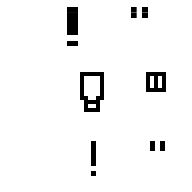

In [7]:
# show a portion of the image
ia.show_image(all_fonts[0:192, 0:192])


# Tasks
A. Rearrange the image into a tensor called `font_sheet` that is ordered like this:

        (rows, cols, font, character)
        
* Showing the image `font_sheet[:, :, 16, 33]` should show the "A" character of the 17th font.
* Showing the image `font_sheet[:, :, 10, 1]` should be the "!" character of the 11th font.

In [11]:
## hint
from jhwutils.matrices import show_boxed_tensor_latex
n = np.arange(100).reshape(5, 20)
show_boxed_tensor_latex(n, box_rows=False)
show_boxed_tensor_latex(n.reshape(1,4,5,5), box_rows=False)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [93]:
# YOUR CODE HERE

#font_sheet= all_fonts.reshape(1856, 6144)
#font_sheet= np.reshape(all_fonts,(29,96,64,64))

print(all_fonts.strides)
strides = all_fonts.itemsize * np.array([49152,8,768, 1])
#strides = B.itemsize * np.array([18, 3, 6, 1])
#strides = B.itemsize * np.array([12, 2, 6, 1])
#np.lib.stride_tricks.as_strided(B, shape = (2,2,3,3), strides = strides)
#font_sheet = np.lib.stride_tricks.as_strided(all_fonts, shape = (29,96,64,64), strides = strides)
font_sheet = np.lib.stride_tricks.as_strided(all_fonts, shape = (64,64,29,96), strides = strides)
print(font_sheet.strides)
#font_sheet= np.reshape(font_sheet,(64,64,29,96))
print(font_sheet.shape)
print(font_sheet[:, :, 16, 33])
#ia.show_image_mpl(font_sheet[:, :, 16, 33])    
    
#print(font_sheet.strides)
#cat_strip = font_sheet.reshape(font_sheet.shape[0], font_sheet.shape[1])

#ia.show_image(cat_strip[:,:10000])
#ia.show_image(all_fonts[0:64, 64:128])

#four_d = np.tile(ia, (64,64,29,96)) #maybe? using f_s gives mem error
#i * stride[0] + j * stride[1] .... striding could also be useful for skipping 64 bits for each char

#so i know this is the size of the tensor, 64*64 is the size of each char in the image, there are 29 rows and 96 cols
#obviously if i know this i could slice it all and recreate it but, that defeats the purpose of numpy i guess...
#[64, 64, 29, 96] 
#[xsizechar, ysizechar, ynochars , xnochars] 



(49152, 8)
(393216, 64, 6144, 8)
(64, 64, 29, 96)
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


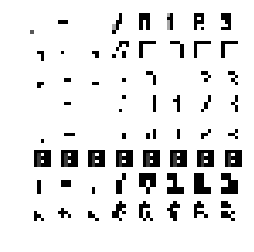

In [94]:
# if your code worked, you should see an ! below
ia.show_image_mpl(font_sheet[:,:,1,0])

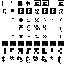

In [41]:
# if your code worked, you should see a gif of letters below
ia.show_gif(np.rollaxis(font_sheet[:,:,8,33:33+26],2), width="20%")


In [42]:
# test shape is correct
with tick.marks(6):        
    assert(check_hash(font_sheet.shape, ((4,), 938.9499472573252)))

In [43]:
# test content is ok
with tick.marks(10):
    assert(np.allclose(array_hash(font_sheet)[1], 56642653249740.27, atol=1e-2, rtol=1e-2))    

AssertionError: 

B. Create an array `mean_letters`, which will be a 2D image containing the mean image of each character, reduced across all fonts, for all of the letters in *the lowercase alphabet*.  The letters should be arranged horizontally and contiguously in a strip in the output image:

       abcdefghijklmnopqrstuvwxyz

You should be able to *vaguely* make out the shape of the letters. Hint: if you have trouble debugging this code, try taking the mean over just one or two fonts, to see if the letter shapes look right, before expanding to cover all fonts.

Hint:
* you will have to partially *undo* some of the swapping/reshaping you did earlier to get the data in the right format
* remember that reductions (like mean) collapse one or more of the dimensions of a tensor
* You'll need to slice -- work out how to slice the array correctly

In [ ]:
# YOUR CODE HERE

In [ ]:
# the results will be blurry, but you should be able to make out the letters (just)
ia.show_image(mean_letters)

In [ ]:

with tick.marks(8):
    assert(check_hash(mean_letters,((64, 1664), 4861094994.1019411)))

C. Show the parts of the letters that are the *most* consistent by computing the standard deviation across the fonts in the same way you computed the mean (hint: `np.std`). Then compute:

        mean_letters_contrast = (contrast_factor - mean / (std+0.1)) 

 Store the result in `mean_letters_contrast`. Use a contrast factor of 3.0. Show the result.
 Hint: this is easy.

In [ ]:
# YOUR CODE HERE

In [ ]:
with tick.marks(5):
    print(array_hash(mean_letters_contrast))
    assert(check_hash(mean_letters_contrast, ((64, 1664), -81760698691.29358)))

# End of assessed portion

----------------------------------

## Extended material

<font color="red"> Material beyond this point is optional. You do not have to attempt it or look at it. There are no marks. 
</font>

## Rendering fonts
Complete the function below. It should render text using the provided font index, and *return* a single array with the text rendered in a horizontal strip. It should use `font_sheet` that you defined earlier. You can assume equal spacing of letters. 

* You can compute the index of the character in the same units as the font sheet using the formula:

      ix = ord(char) - 32
    
Every ASCII character (32-127) should be rendered. Any character that could not be rendered should be rendered as a **blank white** square.    

* It is fine to use a `for` loop to solve this problem

In [ ]:
def render_text(string, font_index):
    """Returns an image with the given string rendered, using the font_index selected.
    Reads characters from font_sheet.
    string: String to be rendered.
    font_index: index of the font to use"""
    pass # you can delete this line
    # YOUR CODE HERE

In [ ]:
# you should be able to read this
ia.show_image(render_text("Can you see this clearly?", 23))

In [ ]:
# this should look the same
ia.show_image(render_text("Can\tyou\nsee\xf5this\x00clearly?", 23))

In [ ]:
ia.show_image(render_text("Data Fundamentals (H)", 1))

In [ ]:
with tick.marks(0):
    assert(check_hash(render_text("Test 1", 1), ((64, 384), 269160963.20571893)))

In [ ]:
with tick.marks(0):
    assert(check_hash(render_text("Test 2", 2),((64, 384), 282670129.18082076)))

In [ ]:
with tick.marks(0):
    assert(check_hash(render_text("Test\n3", 3), ((64, 384), 283057779.18977338)))

In [ ]:
with tick.marks(0):
    assert(check_hash(render_text("\n\tTest\x00\xff4", 4), ((64, 576), 657469474.43368447)))

-----

# Submission instructions

### Checking your work
## Mark summary
You should check the marks you've got before submitting. To do this, 
* Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and matriculation number at the top.
* SAVE THE NOTEBOOK, 
* Go to `Cell/Restart and Run All` in the menu.
* Check the output of the cell here.

Note that this is an estimated mark, and if you don't do the above procedure *carefully* you may get nonsense estimates.


In [ ]:
summarise_marks()

### Formatting the submission
* **WARNING**: If you do not submit the correct file, you will not get any marks.
* Submit this file **only** on Moodle. It will be named `week_<xxx>.ipynb`.


## Penalties (only for assessed labs)
<font color="red">
    
**Malformatted submissions**
</font>
These assignments are processed with an automatic tool; failure to follow instructions *precisely* will lead to you automatically losing two bands in grade regardless of whether the work is correct (not to mention a long delay in getting your work back). **If you submit a file without your work in it, it will be marked and you will get 0 marks.**

<font color="red">**Late submission**</font>
Be aware that there is a two band penalty for every *day* of late submission, starting the moment of the deadline.

<font color="red">
    
**Plagiarism**
</font> Any form of plagiarism will be subject to the Plagiarism Policy. The penalties are severe.